In [67]:
import pandas as pd
import xgboost as xgb
import numpy as np
import datetime as dt
import datetime
import sqlite3
import os
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [68]:
#Destination folder (comment unused directory)
#1 
#os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")
#2
os.chdir("F:/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

# Create your connection.
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

In [74]:
indicator='SP500'
#Get SQLLite select statement for SP500 index and indicators
df = pd.read_sql_query("""select x."Date", c19."Index" Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, p."Index" as Platinum,
ip."Index" as Industrial_Production, pa."Index" as Palladium, x."Index" as """+indicator+"""
 from """+indicator+""" as x
  LEFT OUTER JOIN Covid19 as c19 ON x.Date = C19.Date
  LEFT OUTER JOIN Crude_Oil as co ON x.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON x.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON x.Date=s.Date
  LEFT OUTER JOIN Platinum as p ON x.Date=p.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON strftime('%Y-%m', x.Date)=strftime('%Y-%m', ip.Date)
  LEFT OUTER JOIN Palladium as pa ON x.Date=pa.Date
Where x."Index" and co."Index" and cr."Index" and s."Index" and p."Index"
and ip."Index" and pa."Index" IS NOT NULL
and x.Date < '2020-04-01'
""", conn)

#Delete date column
df = df.drop(columns=['Date'])

df.tail()

,Covid19,Crude_Oil,Copper,Silver,Platinum,Industrial_Production,Palladium,SP500
2510,416881.0,24.49,2.2040,13.965,745.50,103.664,2247.6,2475.56
2511,468092.0,22.60,2.1780,14.415,737.10,103.664,2226.1,2630.07
2512,527839.0,21.51,2.1720,14.315,740.82,103.664,2196.8,2541.47
2513,715377.0,20.09,2.1555,14.055,723.84,103.664,2197.6,2626.65
2514,777187.0,20.48,2.2280,13.930,728.80,103.664,2304.8,2584.59


In [75]:
# fillling with zeros NaN values
df=df.fillna(0)

In [76]:
# splitting data into features X, and labels y
X = df.drop(['SP500'], axis=1)
y = df['SP500']

In [87]:
# splitting data into train and test data
seed = 60
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, 
                                                    random_state=seed)

In [88]:
from sklearn.preprocessing   import StandardScaler

# scaling values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-8.75283560e-02,  9.04767490e-01,  1.33607245e+00, ...,
         1.20444130e+00, -6.36275462e-01, -4.96131305e-01],
       [-8.75283560e-02,  2.99062291e-04, -1.50380154e-01, ...,
         8.35633421e-01, -1.73600011e+00, -1.16058235e+00],
       [-8.75283560e-02, -8.21903872e-01, -9.14765922e-01, ...,
        -8.09001216e-01,  4.32150876e-02, -3.10062165e-01],
       ...,
       [-8.75283560e-02, -5.20866404e-01, -4.47494345e-01, ...,
        -9.97496286e-01,  1.47031880e+00,  2.74786921e+00],
       [-8.75283560e-02, -1.17718232e+00, -1.21452505e+00, ...,
        -6.92025176e-01,  1.21534401e-01, -4.53148334e-01],
       [-8.75283560e-02, -6.85397392e-01, -2.73810382e-01, ...,
        -1.29145162e+00,  1.48463757e+00,  1.81423909e+00]])

## Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [90]:
print('Linear Regression R2: {0:.2f}'.format(r2))

Linear Regression R2: 0.96


In [91]:
print(y_pred)

[1492.17266382 2020.75051163 1823.69675767 1380.84937135 1250.61247907
 1987.30950111 1244.3345383  2715.53683188 1355.66093792 1277.42702976
 1523.44885888 3024.6169592  2140.59549765 1844.67560825 1890.20369852
 2912.09902332 1342.32753248 2971.65211343 1545.37631989 2761.33939609
 2142.54206531 1128.5835948  2090.41075003 2555.82240382 1485.88577043
 1527.64995987 1447.19059192 1776.34715416 1416.70979631 1220.47533781
 1244.74116813 2036.57963687 2967.78870679 1801.16647099 3076.60115489
 2126.43990639 2189.33250524 2520.62621122 2117.05646054 2240.90411666
 2136.28559488 2913.0705862  3011.26377017 2118.70567576 1942.66601251
 3225.9854384  2995.84568104 3009.19304158 1975.4436193  1079.63517737
 1419.28629885 2782.68569346 1943.07711083 1608.50213828 2131.47578893
 1402.94834125 1132.75992227 1935.2949923  1482.35856603 2380.81139999
 1546.85196486 2511.88943831 1621.45256579 2909.52964685 3226.77768599
 1056.0941732  1267.36311053 1469.3921951  2675.68990626 2111.84504385
 1178.

In [96]:
#df1 = df['SP500']
#y_pred1 = pd.DataFrame(y_pred)

#result = pd.concat([df1, y_pred1], axis=1, sort=False)
#result.head()

,SP500,0
0,1132.99,1492.172664
1,1137.14,2020.750512
2,1141.69,1823.696758
3,1144.98,1380.849371
4,1146.98,1250.612479


In [93]:
result.describe()

,SP500,0
count,2515.000000,503.000000
mean,1991.153865,1999.040148
std,607.565787,597.035775
min,1022.580000,1038.430361
25%,1399.730000,1484.122168
50%,2000.720000,2007.082458
75%,2474.470000,2382.828236
max,3386.150000,3340.062755


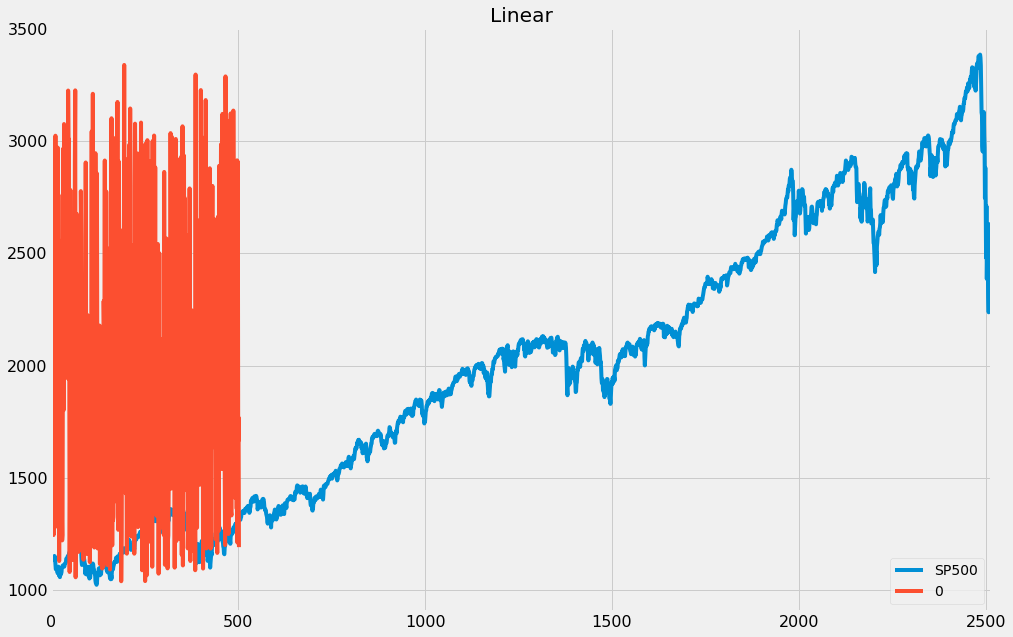

In [94]:
#import matplotlib.pyplot as plt
#%matplotlib inline

#plt.style.use('fivethirtyeight')
#result.plot(title=("Linear"), figsize=(15,10), grid=True, fontsize=16)

## XGBOOST

In [15]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [17]:
print(predictions)

[2783.0, 2599.0, 1111.0, 1125.0, 1859.0, 2723.0, 2093.0, 1320.0, 2080.0, 2664.0, 2104.0, 2783.0, 2926.0, 1272.0, 1960.0, 2102.0, 1296.0, 2721.0, 2783.0, 2102.0, 1182.0, 1320.0, 2926.0, 2080.0, 2103.0, 2926.0, 1182.0, 2040.0, 1178.0, 1193.0, 1119.0, 2439.0, 1087.0, 2439.0, 2019.0, 1403.0, 1402.0, 2328.0, 1910.0, 2430.0, 2182.0, 1116.0, 2723.0, 2382.0, 2092.0, 2415.0, 1418.0, 2639.0, 1272.0, 1988.0, 1615.0, 2926.0, 1178.0, 2439.0, 1178.0, 1681.0, 2063.0, 2349.0, 1880.0, 1178.0, 2171.0, 2430.0, 1272.0, 2416.0, 2926.0, 2102.0, 1982.0, 2663.0, 2723.0, 2840.0, 1296.0, 2588.0, 1995.0, 2723.0, 2075.0, 2102.0, 2351.0, 1272.0, 2102.0, 1272.0, 1401.0, 1163.0, 1960.0, 2275.0, 2092.0, 2700.0, 1722.0, 1335.0, 2126.0, 2415.0, 1272.0, 2102.0, 2723.0, 1768.0, 2723.0, 2102.0, 2416.0, 2926.0, 1345.0, 2783.0, 1320.0, 1154.0, 2439.0, 1401.0, 2926.0, 1272.0, 2783.0, 2783.0, 2102.0, 1154.0, 1629.0, 2165.0, 2926.0, 2101.0, 1927.0, 2127.0, 2293.0, 1795.0, 1090.0, 2416.0, 1272.0, 1356.0, 2926.0, 2072.0, 1139.0,

In [18]:
# evaluate predictions
#accuracy_score(y_true, y_pred.round(), normalize=False)
r2 = r2_score(y_test, predictions)
print("r2: %.2f%%" % (r2 * 100.0))

r2: 94.10%
